In [729]:
import numpy as np
import gym
import nle
import random
from importlib import reload
import MyAgent
reload(MyAgent)
import wandb
import json
import os
from numpyencoder import NumpyEncoder
from tqdm import tqdm
import matplotlib.pyplot as plt


In [730]:
conf = {
    'depth':20,
    'seed':24,
    'action_space':[1,2,3,4,9,10,11,12],
    'max_rollout_step':800,
    'max_rollout_reward':2,
    'movement_penalty':-0.2,
    'min_rollout_reward':-20,
    
}
wandb.config = conf

In [731]:
wandb.init(project='nle_mcts_agent',config = conf)

episode_return,350.34
reward,0.0
mean_rollout_lengths,19.84765
mean_rollout_rewards,27.09033
action,10
_step,826
_runtime,1007
_timestamp,1606564008


episode_return,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▃▄▅▅▅▅▆▆▆▆▇▇████
reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁
mean_rollout_lengths,█▆▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mean_rollout_rewards,▁▃▃▄▅▆▇▇▇▇█████████████████████████▇▇▇▇▇
action,▆▁▆█▆▆▄▁▁▁█▂▂▆█▄▂▅▂▆▂▁▂▁▁█▅▆██▆▂▁█▅▂▁▅▅▂
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_runtime,▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▆▆▆▆▇▇▇██
_timestamp,▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▆▆▆▆▇▇▇██


In [733]:
# Initialise environment
env = gym.make("NetHackScore-v0",savedir=None)
# Number of times each seed will be run
rewards = []
directory = os.getcwd()
# env.print_action_meanings()
seed_rewards = []
seed = wandb.config.seed
done = False
episode_return = 0.0
env.seed(seed,seed,False)
state = env.reset()
count = 0
agent =  MyAgent.MyAgent(env.observation_space, env.action_space, seeds=env.get_seeds(),depth = wandb.config.depth)

In [ ]:
while not done:
    action = agent.act(None)
    new_state, reward, done, _ = env.step(action)
    wandb.log({'episode_return':episode_return,
               'reward':reward,
               'mean_rollout_lengths':np.mean(agent.rollout_lengths),
               'mean_rollout_rewards':np.mean(agent.rollout_rewards),
               'action':action,
              })
    episode_return += reward
    if done:
        print("Done")
        break


In [727]:
agent.env.render()

b''
5 gold pieces                                                                   
an uncursed +2 pair of leather gloves (being worn)                              
an uncursed +1 robe (being worn)                                                
a blessed spellbook of protection                                               
an uncursed scroll of destroy armor                                             
3 uncursed potions of healing                                                   
5 uncursed food rations                                                         
6 uncursed apples                                                               
5 uncursed oranges                                                              
3 uncursed fortune cookies                                                      
an uncursed potion of water                                                     
an uncursed potion of polymorph                                                 
                        

                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                        

In [724]:
s,r,d = agent.StepEnvironment()

TypeError: StepEnvironment() missing 1 required positional argument: 'state'

In [670]:
latest_state = agent.StepEnvironment(3888)
possible_moves,descend = agent.getLegalMoves(latest_state)

ValueError: operands could not be broadcast together with shapes (9,) (0,) 

In [532]:
# import time
# start = time.time()

# action = agent.act(None)
# # 
# done = time.time()
# elapsed = done - start
# print(elapsed)
# print(action)

In [533]:
# agent.tree.dictionary

In [534]:
# print(agent.tree.dictionary)

In [535]:
# this = {0: {'parent': None, 'actions': [], 'isTerminal': False, 'children': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 'reward': 1561.3099999999974, 'visits': 100}, 1: {'parent': 0, 'actions': [1], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 2: {'parent': 0, 'actions': [14], 'isTerminal': False, 'children': [], 'reward': 3.0600000000000107, 'visits': 1, 'is_good': True}, 3: {'parent': 0, 'actions': [7], 'isTerminal': False, 'children': [], 'reward': 7.090000000000012, 'visits': 1, 'is_good': True}, 4: {'parent': 0, 'actions': [5], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 5: {'parent': 0, 'actions': [3], 'isTerminal': False, 'children': [34, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87], 'reward': 877.2299999999981, 'visits': 37, 'is_good': True}, 6: {'parent': 0, 'actions': [13], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 7: {'parent': 0, 'actions': [0], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 8: {'parent': 0, 'actions': [22], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 9: {'parent': 0, 'actions': [19], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 10: {'parent': 0, 'actions': [6], 'isTerminal': False, 'children': [], 'reward': -1.300000000000001, 'visits': 1, 'is_good': True}, 11: {'parent': 0, 'actions': [10], 'isTerminal': False, 'children': [37], 'reward': 25.379999999999928, 'visits': 2, 'is_good': True}, 12: {'parent': 0, 'actions': [2], 'isTerminal': False, 'children': [24, 26, 27, 28, 29, 30, 31, 33, 36, 43, 45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 59, 60, 63], 'reward': 382.37999999999977, 'visits': 25, 'is_good': True}, 13: {'parent': 0, 'actions': [20], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 14: {'parent': 0, 'actions': [17], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 15: {'parent': 0, 'actions': [21], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 16: {'parent': 0, 'actions': [9], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 17: {'parent': 0, 'actions': [4], 'isTerminal': False, 'children': [25, 38, 39, 40, 41, 44, 50, 51, 57, 61, 62, 65], 'reward': 182.0799999999999, 'visits': 13, 'is_good': True}, 18: {'parent': 0, 'actions': [8], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 19: {'parent': 0, 'actions': [11], 'isTerminal': False, 'children': [42], 'reward': 24.58999999999982, 'visits': 2, 'is_good': True}, 20: {'parent': 0, 'actions': [12], 'isTerminal': False, 'children': [32, 58], 'reward': 33.570000000000064, 'visits': 3, 'is_good': True}, 21: {'parent': 0, 'actions': [15], 'isTerminal': False, 'children': [35], 'reward': 27.229999999999908, 'visits': 2, 'is_good': True}, 22: {'parent': 0, 'actions': [16], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 23: {'parent': 0, 'actions': [18], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 24: {'parent': 12, 'actions': [2, 14], 'isTerminal': False, 'children': [], 'reward': -0.6700000000000004, 'visits': 1, 'is_good': True}, 25: {'parent': 17, 'actions': [4, 15], 'isTerminal': False, 'children': [], 'reward': -0.3000000000000001, 'visits': 1, 'is_good': True}, 26: {'parent': 12, 'actions': [2, 11], 'isTerminal': False, 'children': [], 'reward': 65.86999999999989, 'visits': 1, 'is_good': True}, 27: {'parent': 12, 'actions': [2, 3], 'isTerminal': False, 'children': [], 'reward': 66.29999999999978, 'visits': 1, 'is_good': True}, 28: {'parent': 12, 'actions': [2, 22], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 29: {'parent': 12, 'actions': [2, 7], 'isTerminal': False, 'children': [], 'reward': 52.860000000000326, 'visits': 1, 'is_good': True}, 30: {'parent': 12, 'actions': [2, 5], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 31: {'parent': 12, 'actions': [2, 19], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 32: {'parent': 20, 'actions': [12, 12], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 33: {'parent': 12, 'actions': [2, 1], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 34: {'parent': 5, 'actions': [3, 9], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 35: {'parent': 21, 'actions': [15, 7], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 36: {'parent': 12, 'actions': [2, 15], 'isTerminal': False, 'children': [], 'reward': -0.6200000000000003, 'visits': 1, 'is_good': True}, 37: {'parent': 11, 'actions': [10, 19], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 38: {'parent': 17, 'actions': [4, 2], 'isTerminal': False, 'children': [], 'reward': 26.849999999999945, 'visits': 1, 'is_good': True}, 39: {'parent': 17, 'actions': [4, 4], 'isTerminal': False, 'children': [], 'reward': 71.01000000000002, 'visits': 1, 'is_good': True}, 40: {'parent': 17, 'actions': [4, 16], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 41: {'parent': 17, 'actions': [4, 13], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 42: {'parent': 19, 'actions': [11, 21], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 43: {'parent': 12, 'actions': [2, 17], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 44: {'parent': 17, 'actions': [4, 1], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 45: {'parent': 12, 'actions': [2, 6], 'isTerminal': False, 'children': [64], 'reward': 72.69000000000004, 'visits': 2, 'is_good': True}, 46: {'parent': 12, 'actions': [2, 16], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 47: {'parent': 12, 'actions': [2, 13], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 48: {'parent': 12, 'actions': [2, 2], 'isTerminal': False, 'children': [], 'reward': 3.5800000000000063, 'visits': 1, 'is_good': True}, 49: {'parent': 12, 'actions': [2, 18], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 50: {'parent': 17, 'actions': [4, 10], 'isTerminal': False, 'children': [], 'reward': 13.730000000000043, 'visits': 1, 'is_good': True}, 51: {'parent': 17, 'actions': [4, 9], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 52: {'parent': 12, 'actions': [2, 10], 'isTerminal': False, 'children': [], 'reward': 24.920000000000005, 'visits': 1, 'is_good': True}, 53: {'parent': 12, 'actions': [2, 0], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 54: {'parent': 12, 'actions': [2, 12], 'isTerminal': False, 'children': [], 'reward': 25.14000000000003, 'visits': 1, 'is_good': True}, 55: {'parent': 12, 'actions': [2, 21], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 56: {'kickdir': 4, 'parent': 12, 'actions': [2, 20], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 57: {'parent': 17, 'actions': [4, 0], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 58: {'parent': 20, 'actions': [12, 4], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 59: {'parent': 12, 'actions': [2, 8], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 60: {'parent': 12, 'actions': [2, 4], 'isTerminal': False, 'children': [], 'reward': 1.6200000000000272, 'visits': 1, 'is_good': True}, 61: {'parent': 17, 'actions': [4, 12], 'isTerminal': False, 'children': [], 'reward': 18.599999999999987, 'visits': 1, 'is_good': True}, 62: {'parent': 17, 'actions': [4, 22], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 63: {'parent': 12, 'actions': [2, 9], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 64: {'parent': 45, 'actions': [2, 6, 2], 'isTerminal': False, 'children': [], 'reward': -0.4200000000000002, 'visits': 1, 'is_good': True}, 65: {'parent': 17, 'actions': [4, 19], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 66: {'parent': 5, 'actions': [3, 3], 'isTerminal': False, 'children': [99], 'reward': 51.74000000000008, 'visits': 2, 'is_good': True}, 67: {'kickdir': 6, 'parent': 5, 'actions': [3, 20], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 68: {'parent': 5, 'actions': [3, 21], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 69: {'parent': 5, 'actions': [3, 13], 'isTerminal': False, 'children': [], 'reward': 36.600000000000065, 'visits': 1, 'is_good': True}, 70: {'parent': 5, 'actions': [3, 2], 'isTerminal': False, 'children': [88, 93, 98], 'reward': 183.14999999999995, 'visits': 4, 'is_good': True}, 71: {'parent': 5, 'actions': [3, 19], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 72: {'parent': 5, 'actions': [3, 18], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 73: {'parent': 5, 'actions': [3, 4], 'isTerminal': False, 'children': [], 'reward': 3.6200000000000037, 'visits': 1, 'is_good': True}, 74: {'parent': 5, 'actions': [3, 22], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 75: {'parent': 5, 'actions': [3, 5], 'isTerminal': False, 'children': [], 'reward': 25.87000000000002, 'visits': 1, 'is_good': True}, 76: {'parent': 5, 'actions': [3, 7], 'isTerminal': False, 'children': [89, 91, 92, 94, 95, 96, 100], 'reward': 367.3399999999996, 'visits': 8, 'is_good': True}, 77: {'parent': 5, 'actions': [3, 16], 'isTerminal': False, 'children': [90, 97], 'reward': 116.28999999999904, 'visits': 3, 'is_good': True}, 78: {'parent': 5, 'actions': [3, 15], 'isTerminal': False, 'children': [], 'reward': 29.009999999999785, 'visits': 1, 'is_good': True}, 79: {'parent': 5, 'actions': [3, 17], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 80: {'parent': 5, 'actions': [3, 10], 'isTerminal': False, 'children': [], 'reward': -0.3200000000000001, 'visits': 1, 'is_good': True}, 81: {'parent': 5, 'actions': [3, 0], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 82: {'parent': 5, 'actions': [3, 11], 'isTerminal': False, 'children': [], 'reward': 3.280000000000012, 'visits': 1, 'is_good': True}, 83: {'parent': 5, 'actions': [3, 14], 'isTerminal': False, 'children': [], 'reward': -0.26000000000000006, 'visits': 1, 'is_good': True}, 84: {'parent': 5, 'actions': [3, 12], 'isTerminal': False, 'children': [], 'reward': 31.16999999999989, 'visits': 1, 'is_good': True}, 85: {'parent': 5, 'actions': [3, 6], 'isTerminal': False, 'children': [], 'reward': 3.6000000000000023, 'visits': 1, 'is_good': True}, 86: {'parent': 5, 'actions': [3, 8], 'isTerminal': False, 'children': [], 'reward': -1.5700000000000012, 'visits': 1, 'is_good': True}, 87: {'parent': 5, 'actions': [3, 1], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 88: {'parent': 70, 'actions': [3, 2, 22], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 89: {'parent': 76, 'actions': [3, 7, 2], 'isTerminal': False, 'children': [], 'reward': 45.33000000000001, 'visits': 1, 'is_good': True}, 90: {'parent': 77, 'actions': [3, 16, 12], 'isTerminal': False, 'children': [], 'reward': 3.0800000000000045, 'visits': 1, 'is_good': True}, 91: {'parent': 76, 'actions': [3, 7, 12], 'isTerminal': False, 'children': [], 'reward': 61.35000000000018, 'visits': 1, 'is_good': True}, 92: {'parent': 76, 'actions': [3, 7, 17], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 93: {'parent': 70, 'actions': [3, 2, 9], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 94: {'parent': 76, 'actions': [3, 7, 5], 'isTerminal': False, 'children': [], 'reward': 97.36999999999912, 'visits': 1, 'is_good': True}, 95: {'parent': 76, 'actions': [3, 7, 11], 'isTerminal': False, 'children': [], 'reward': 23.50999999999999, 'visits': 1, 'is_good': True}, 96: {'parent': 76, 'actions': [3, 7, 9], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 97: {'parent': 77, 'actions': [3, 16, 1], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 98: {'parent': 70, 'actions': [3, 2, 2], 'isTerminal': False, 'children': [], 'reward': 21.929999999999854, 'visits': 1, 'is_good': True}, 99: {'parent': 66, 'actions': [3, 3, 18], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}, 100: {'parent': 76, 'actions': [3, 7, 1], 'isTerminal': False, 'children': [], 'reward': 0, 'visits': 1, 'is_good': False}}

In [536]:
# with open('myfile.txt', 'w') as f:
#     print(mydictionary, file=f)

In [537]:
# agent.tree.dictionary

In [538]:
# while not doned:
#     # pass state to agent and let agent decide action
#     action = agent.act(None)
#     print(action)
#     new_state, reward, done, _ = env.step(action)
#     episode_return += reward
#     env.render()
#     #wandb.log({"Reward": reward, "Seed" : seed})
#     state = new_state
#     #env.render()
#     #wandb.log({"Epsiode-Return": episode_return, "Seed" : seed})
#     count+=1
# #     break
#     if count %200 == 0:
#         break
#         #env.render()
# #         agent.save(episode_return,directory)
#     print(action, episode_return)

In [14]:
with open('4diragent.txt', 'w') as f:
    print(agent.tree.dictionary, file=f)

In [194]:
np.mean(agent.rollout_lengths)

755.5454545454545

In [634]:
act_set = agent.actions[0:(agent.actions.index(18))+1]

ValueError: 18 is not in list

In [630]:
for i,a in enumerate(tqdm(act_set)):

    action = a
    new_state, reward, done, _ = env.step(action)
    wandb.log({'episode_return':episode_return,
               'reward':reward,
               'mean_rollout_lengths':np.mean(agent.rollout_lengths),
               'mean_rollout_rewards':np.mean(agent.rollout_rewards),
               'action':action,
              })
    episode_return += reward
    state = new_state

100%|██████████| 266/266 [00:00<00:00, 7768.64it/s]


In [631]:
act_set

[11,
 4,
 10,
 2,
 12,
 2,
 12,
 12,
 10,
 2,
 4,
 10,
 2,
 12,
 10,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 4,
 9,
 9,
 9,
 3,
 1,
 2,
 4,
 3,
 9,
 1,
 11,
 4,
 10,
 2,
 12,
 2,
 12,
 2,
 4,
 2,
 2,
 1,
 2,
 9,
 3,
 9,
 11,
 4,
 2,
 4,
 10,
 4,
 12,
 3,
 9,
 2,
 3,
 12,
 1,
 12,
 4,
 4,
 2,
 4,
 11,
 9,
 1,
 4,
 3,
 4,
 3,
 1,
 11,
 10,
 4,
 9,
 10,
 4,
 11,
 4,
 1,
 3,
 12,
 2,
 9,
 1,
 9,
 9,
 3,
 11,
 4,
 1,
 12,
 10,
 4,
 12,
 3,
 11,
 12,
 9,
 2,
 4,
 2,
 2,
 4,
 2,
 4,
 4,
 9,
 11,
 4,
 9,
 11,
 2,
 12,
 11,
 12,
 11,
 4,
 4,
 12,
 4,
 1,
 9,
 12,
 12,
 4,
 2,
 1,
 2,
 4,
 10,
 2,
 11,
 3,
 1,
 4,
 4,
 4,
 1,
 3,
 1,
 4,
 10,
 3,
 2,
 11,
 2,
 11,
 2,
 2,
 4,
 2,
 4,
 2,
 4,
 1,
 3,
 10,
 9,
 10,
 11,
 3,
 1,
 1,
 1,
 4,
 4,
 10,
 1,
 3,
 3,
 4,
 12,
 11,
 4,
 12,
 3,
 9,
 1,
 1,
 12,
 9,
 2,
 3,
 10,
 12,
 10,
 10,
 10,
 4,
 2,
 4,
 2,
 4,
 12,
 9,
 10,
 12,
 4,
 10,
 2,
 1,
 1,
 4,
 4,
 1,
 2,
 3,
 9,
 12,
 2,
 2,
 11,
 11,
 4,
 2,
 12,
 9,
 1,
 9,
 11,
 2,
 2,
 12,
 12,
 2,
 4,
 4,


In [632]:
env.render()

b''
4 gold pieces                                                                   
an uncursed +2 pair of leather gloves (being worn)                              
an uncursed +1 robe (being worn)                                                
a blessed spellbook of healing                                                  
an uncursed scroll of destroy armor                                             
3 uncursed potions of healing                                                   
3 uncursed food rations                                                         
5 uncursed apples                                                               
5 uncursed oranges                                                              
3 uncursed fortune cookies                                                      
a magic marker (0:95)                                                           
                                                                               
                         

   |..........%...|     ##########@######################         .|           
   |!%.............#       #             #  ###      ####### #    .            
   ----------------##     ##                        #####  ###                 
                    ##    #             -----.-------  ### #                   
                     ##   #             .............  # ####     #            
                      #  -|---          |.............|##########`###          
                      #  |...|     `    |......[......|  %  #####-.-.-         
                      #  |.`..######    ...............###      #|...|         


                      ###....| ###      |.............|         #|...|         
                         |^..-##        ---------------         #...?|         
                         -----                                   -----         
                                                                               
                                                                               


In [623]:
len(agent.actions) - 1 - agent.actions[::-1].index(18)

1830

In [625]:
len(agent.actions)

1831

In [689]:
action = int(input('Gib move: '))
new_state, reward, done, r2 = env.step(action)
# new_state2, reward2, done2, r2 = env2.step(action)
episode_return += reward
print('reward1',reward)
# print('reward2',reward2)
env.render()
# env2.render()
state = new_state


Gib move: 2


RuntimeError: Called step on finished NetHack

In [694]:
agent.tree.dictionary

defaultdict(<function Node.Tree.__init__.<locals>.<lambda>()>,
            {3560: {'pre_descend': -1,
              'parent': None,
              'actions': [10,
               10,
               2,
               2,
               10,
               4,
               11,
               4,
               1,
               4,
               1,
               4,
               10,
               10,
               12,
               10,
               4,
               9,
               3,
               11,
               12,
               2,
               2,
               2,
               4,
               10,
               1,
               1,
               11,
               1,
               11,
               1,
               3,
               1,
               11,
               11,
               4,
               10,
               9,
               9,
               1,
               3,
               9,
               3,
               4,
               11,
            

In [695]:
s,r,d = agent.StepEnvironment(3560)

In [696]:
d

{'stats': {}, 'end_status': <StepStatus.DEATH: 1>}

In [675]:
def getSurrounding(state):
    col,row = state['blstats'][0],state['blstats'][1]
    vicinity = state['glyphs'][row-1:row+2,col-1:col+2]
    plt.imshow(vicinity,cmap='inferno')
    print(vicinity)
    return vicinity

In [676]:
def getLegalMoves(state):
    vicinity = getSurrounding(state).flatten()
    stairs = np.where(vic.flatten()==2383)
    descend = len(stairs[0])==1

    legals = [int(i==0) or int(i>2359 and i<2370) for i in vicinity]
#     [null_space,dog,space in room, hallway space,doorway or broken door,open door]
#     kickables = [int(i in [0,397,333,2378,2380,2371,2373]) or int(i>2359 and i<2370) for i in vicinity.flatten()]
    legals = np.ones(len(legals),dtype=np.int8) - legals
#     kickables = np.ones(len(kickables),dtype=np.int8) - kickables
    close_move = [8,1,5,4,19,2,7,3,6] #first eight positions
#     long_move = [16,9,13,12,19,10,15,11,14] #long eight positions
    legal_close = np.unique(close_move*legals)[1:-1]
#     legal_long = np.unique(long_move*legals)[1:-1]
#     kickables = np.unique(close_move*kickables)[1:]
    if not descend:
        descend = []
    else:
        descend = [close_move[stairs[0][0]]]
    return list(legal_close),vicinity,descend
#     return(list(legal_close) + list(legal_long)),kickables
    
    

[]


<ipython-input-675-be16ac0dc5e1>:4: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(vicinity,cmap='inferno')
<ipython-input-675-be16ac0dc5e1>:4: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(vicinity,cmap='inferno')


ValueError: operands could not be broadcast together with shapes (9,) (0,) 

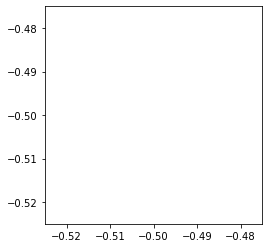

In [677]:
moves,vic,des = getLegalMoves(latest_state)